# Análisis sobre Kendo

In [1]:
import json
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
folder = Path('players/')
files = folder.glob('*.json')

#for file in files:
#    try:
#        with open(file, 'r', encoding='utf-8') as f:
#            datas = json.load(f)
#            print(f'Contendio de {file.name}: {datas}')
#    except json.JSONDecodeError as e:
#        print(f'Contendio erróneo de {file.name}: {e}')

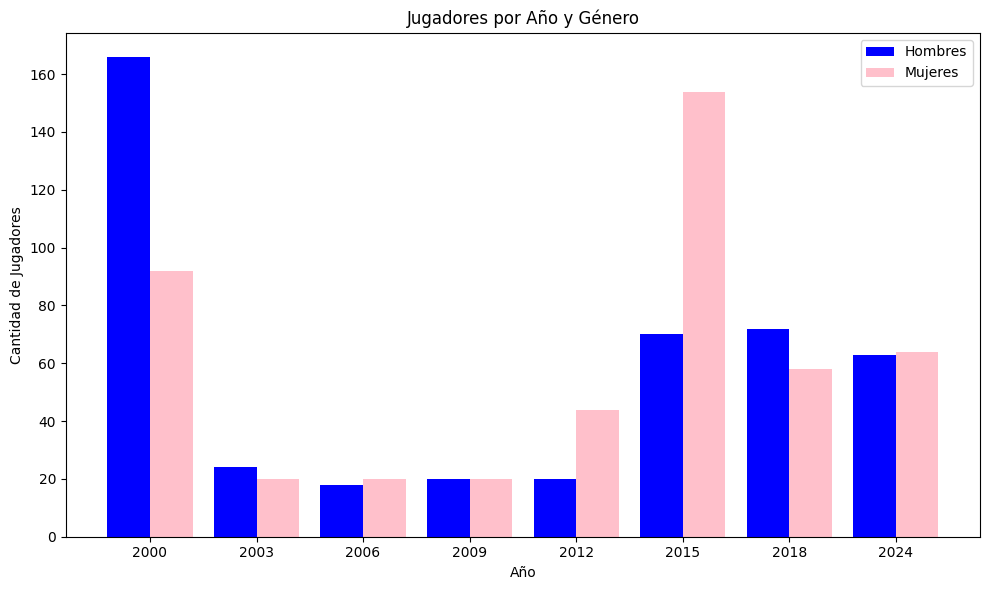

In [3]:
folder = Path("players/")
files = folder.glob("*.json")

year_gender_counts = {
    "2000": {"male": 0, "female": 0},
    "2003": {"male": 0, "female": 0},
    "2006": {"male": 0, "female": 0},
    "2009": {"male": 0, "female": 0},
    "2012": {"male": 0, "female": 0},
    "2015": {"male": 0, "female": 0},
    "2018": {"male": 0, "female": 0},
    "2024": {"male": 0, "female": 0},
}

for file in files:
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
        for player in data:
            year = player.get("year")
            gender = player.get("gender")

            if year in year_gender_counts and gender in ["male", "female"]:
                year_gender_counts[year][gender] += 1

years = sorted(year_gender_counts.keys())
male_counts = [year_gender_counts[year]["male"] for year in years]
female_counts = [year_gender_counts[year]["female"] for year in years]

bar_width = 0.4
x = range(len(years))

plt.figure(figsize=(10, 6))
plt.bar(x, male_counts, width=bar_width, label="Hombres", color="blue", align="center")
plt.bar(
    [i + bar_width for i in x], 
    female_counts, 
    width=bar_width, 
    label="Mujeres", 
    color="pink", 
    align="center"
)
plt.xlabel("Año")
plt.ylabel("Cantidad de Jugadores")
plt.title("Jugadores por Año y Género")
plt.xticks([i + bar_width/2 for i in x], years)
plt.legend()
plt.tight_layout()
plt.show()

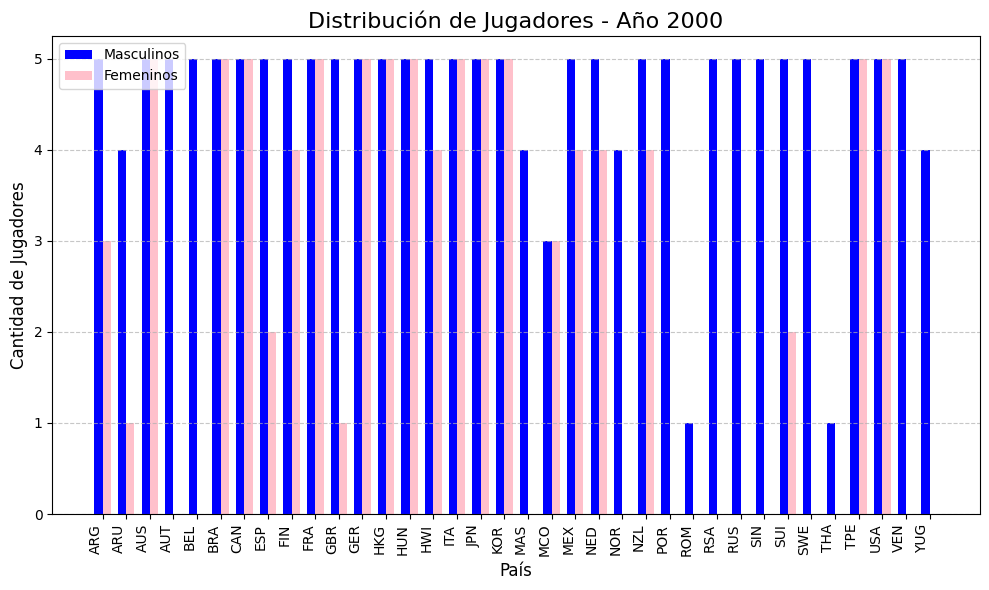

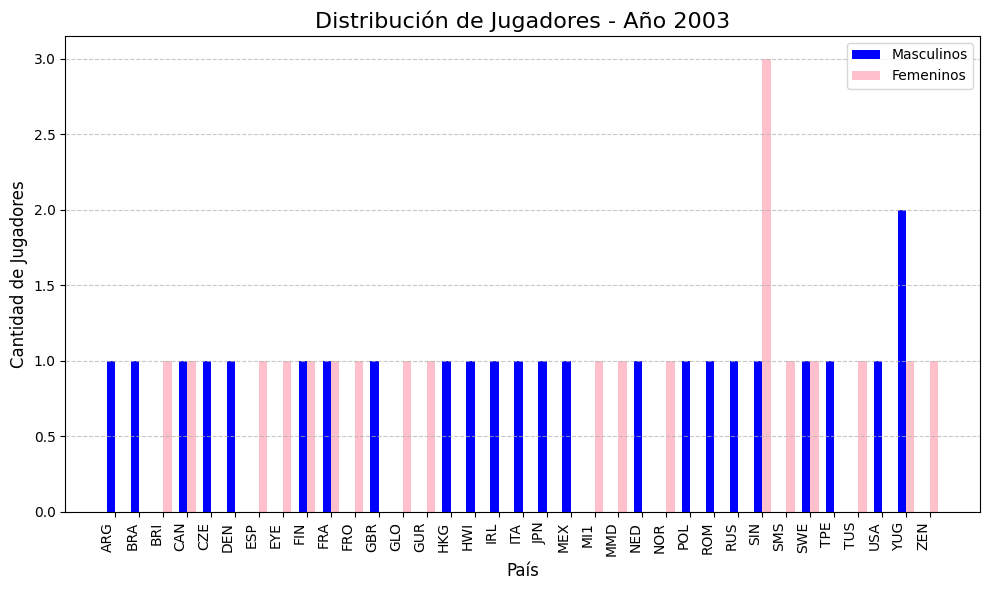

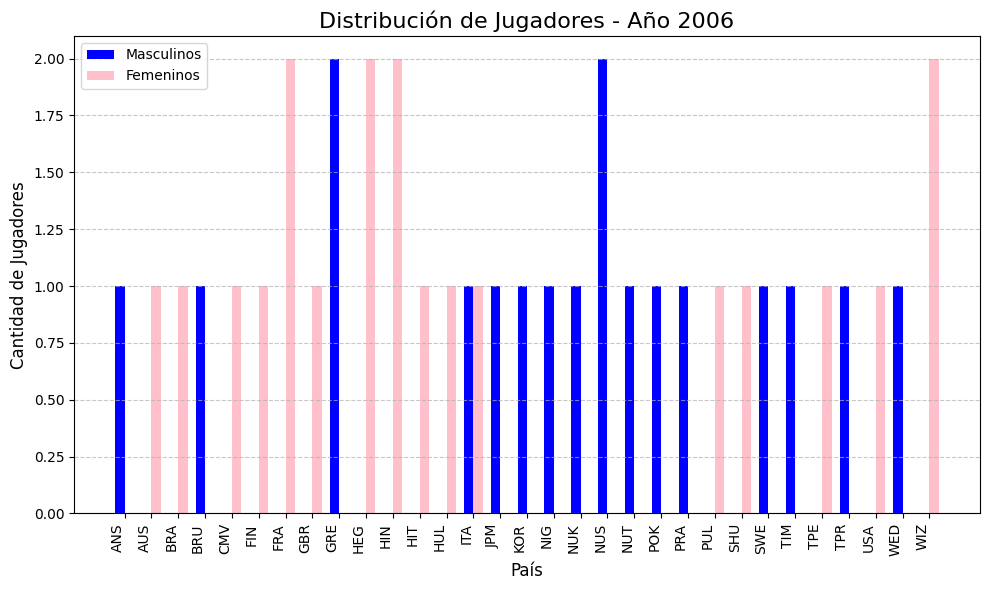

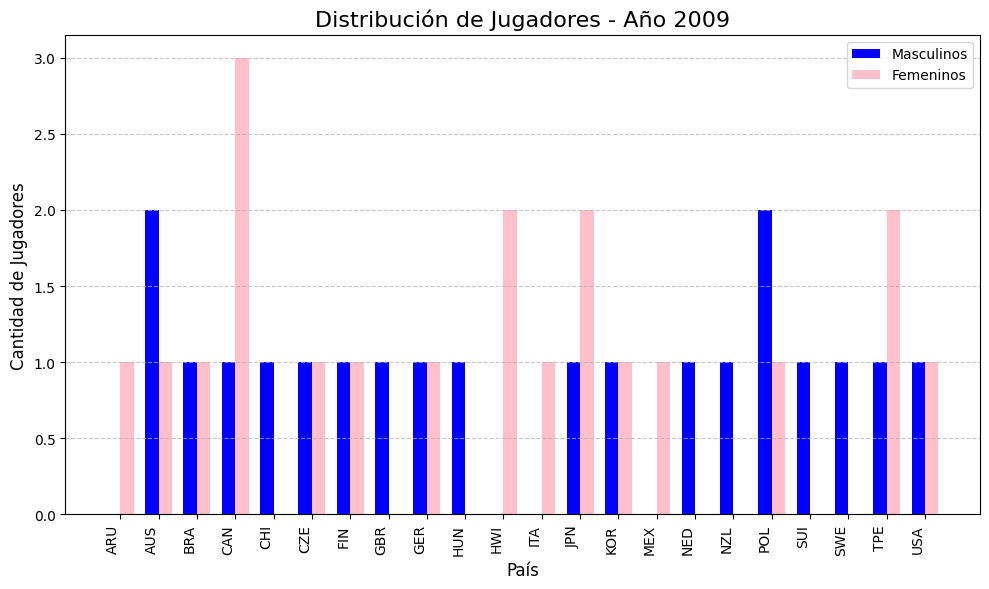

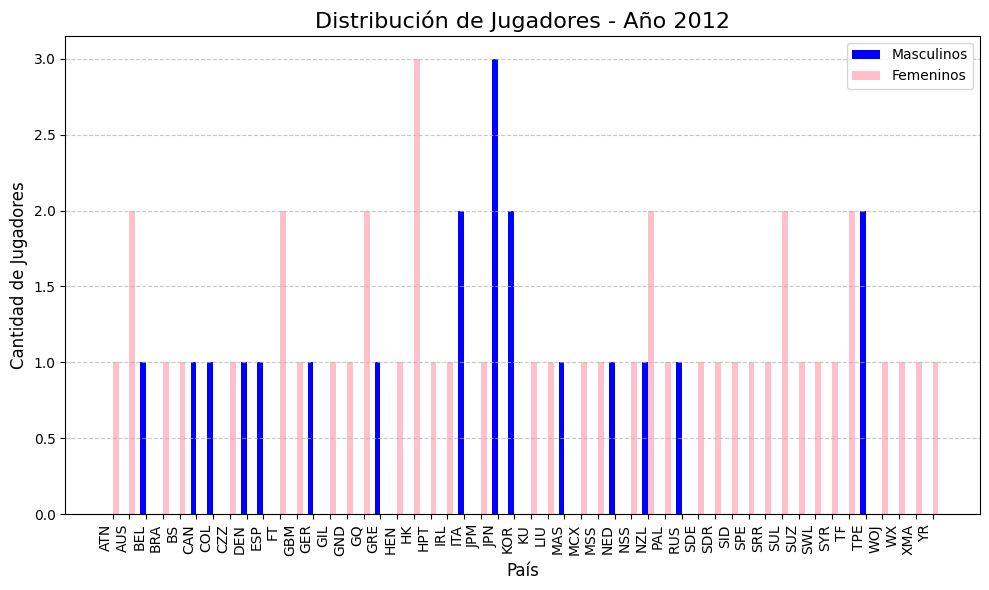

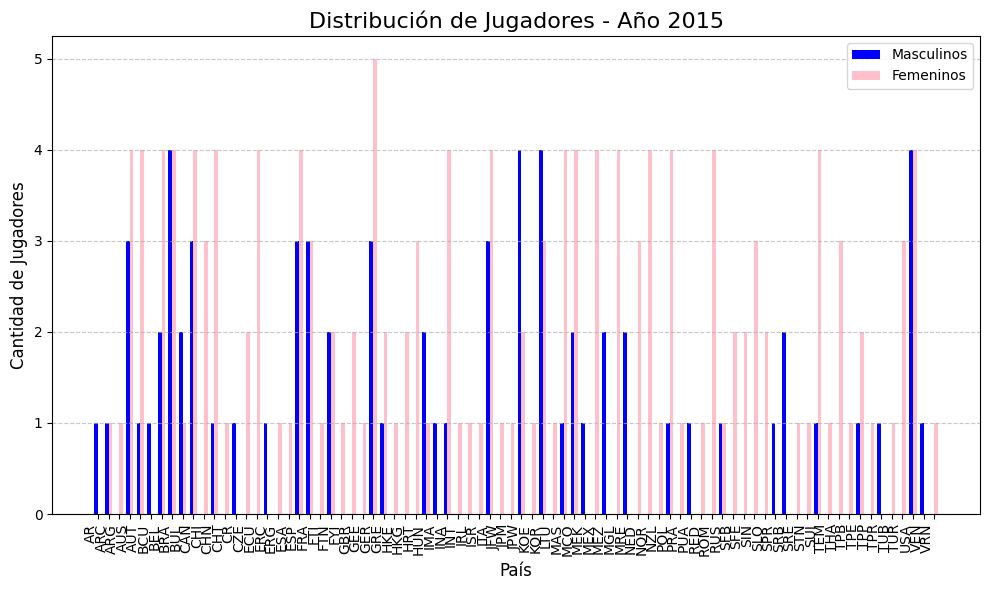

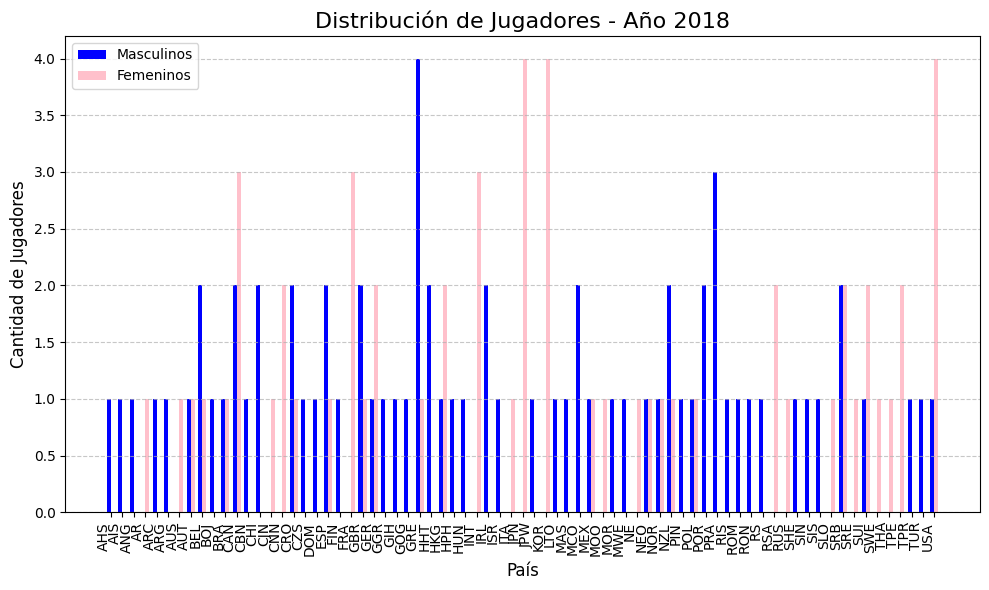

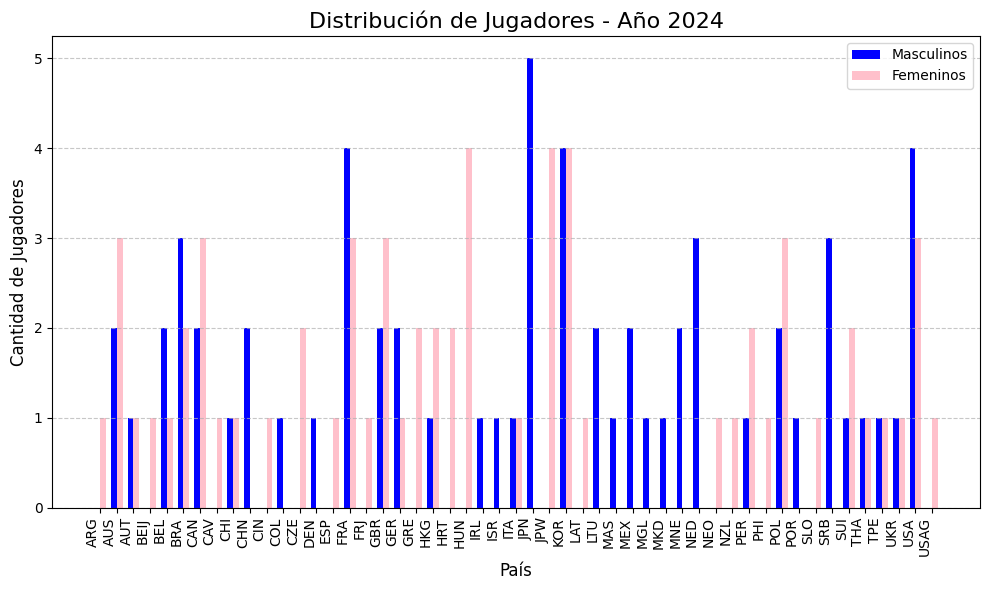

In [ ]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np

# Configuración inicial
folder = Path("players/")
files = folder.glob("*.json")
players_count = {}

# Procesar archivos y contar jugadores
for file in files:
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
        for player in data:
            year = player.get("year", "Desconocido")
            country = player.get("country", "Desconocido")
            gender = player.get("gender", "unknown")

            if year not in players_count:
                players_count[year] = {}
            if country not in players_count[year]:
                players_count[year][country] = {"male": 0, "female": 0}

            if gender in ["male", "female"]:
                players_count[year][country][gender] += 1

for year in sorted(players_count.keys()):
    countries = sorted(players_count[year].keys())
    male_counts = [players_count[year][country]["male"] for country in countries]
    female_counts = [players_count[year][country]["female"] for country in countries]
        
    bar_width = 0.35
    x = np.arange(len(countries))
    
    plt.figure(figsize=(10, 6))
    plt.bar(x - bar_width/2, male_counts, width=bar_width, label="Masculinos", color="blue")
    plt.bar(x + bar_width/2, female_counts, width=bar_width, label="Femeninos", color="pink")
    plt.title(f"Distribución de Jugadores - Año {year}", fontsize=16)
    plt.xlabel("País", fontsize=12)
    plt.ylabel("Cantidad de Jugadores", fontsize=12)
    plt.xticks(x, countries, rotation=90, ha="right")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()